## Preparation

Import library first

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Import dataset**
<br>
The dataset contains 7 features that are then used to classify gender. These features include:

*   long_hair (1 = long hair | 0 = not long hair)
*   forehead_width_cm (the width of the forehead in CM's)
*   forehead_height_cm (the height of the forehead in CM's)
*   nose_wide (1 = wide nose | 0 = not wide nose)
*   nose_long (1 = long nose | 0 = not long nose)
*   lips_thin (1 = thin lips | 0 = not thin lips)
*   distance_nose_to_lip_long (1 = long distance between nose and lips | 0 = short distance between nose and lips)
*   gender (This is either "Male" or "Female")





In [ ]:
data = pd.read_csv('/content/gender_classification_v7.csv')
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


## Explore Data

Now the DataFrames have been loaded, the first step is explore the dataset to understand it

In [ ]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


## Pre processing Data

From exploration we know no more null values in dataset. But the gender column still has an object data type. Therefore, we will change it to a integer type.

Transformation Data

In [ ]:
data['gender'] = data['gender'].replace(('Female', 'Male'),(0,1))
data

<ipython-input-6-cb02d5566ed9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace(('Female', 'Male'),(0,1))


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


**Features Selection**
<br>
After that we do features selection to select the features that will be used in the training and testing phases

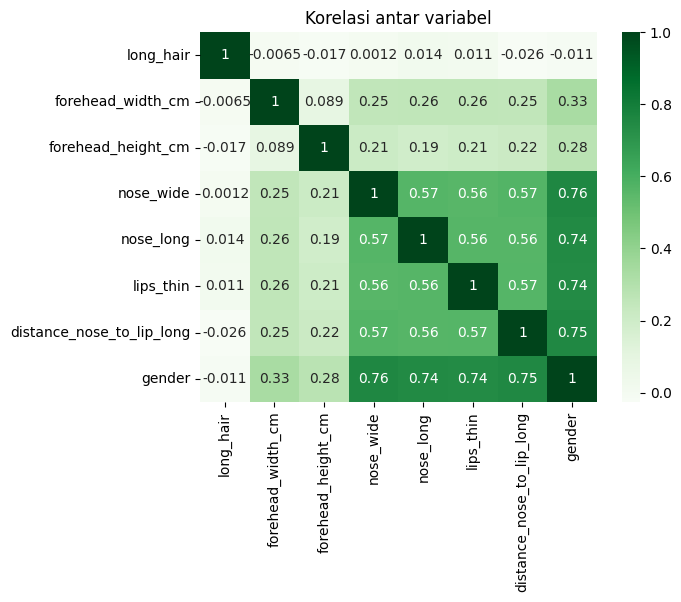

In [ ]:
korelasi = data.corr()

sn.heatmap(korelasi, annot=True, cmap='Greens')
plt.title('Korelasi antar variabel')
plt.show()

From the results above, 4 features were taken that had the highest correlation values ​​with the gender feature, including nose_wide, nose_long, lips_thin and distance_nose_to_lip_long

## Data Modeling

In [ ]:
x = data.drop(columns=['long_hair','forehead_width_cm','forehead_height_cm','gender'])
y = data['gender']

**Split data**
<br>
We split data itu data training and testing. We use 80% to training and 20% to testing  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 4)
(4000,)
(1001, 4)
(1001,)


Train & Test using Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'gini')

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       502
           1       0.96      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001

